In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import json

In [7]:
data = []
keys = []
methods = ["replace", "swap", "original", "all"]
apply = ["train", "eval"]
ratios = ['55', '64', '73', '82', 'full']

for method in methods:
    for kind in apply:
        for ratio in ratios:
            try:
                with open("results_{}_{}_{}.json".format(kind, method, ratio)) as file:
                    keys.append("{}_{}_{}".format(method, kind, ratio))
                    results = json.load(file)
                    for key in results.keys():
                        results[key]['method'] = method
                        results[key]['apply'] = kind
                        results[key]['ratio'] = ratio
                    data.append(pd.DataFrame.from_dict(results, orient='index'))
            except IOError:
                # print("No file found at results_{}_{}_{}.json".format(kind, method, ratio))
                continue

In [8]:
df = pd.concat(data, keys=keys)
df

exact         f1  total  HasAns_exact  \
replace_train_55   epoch-0  70.331363  75.326628  31808     53.285132   
                   epoch-1  73.663858  79.736418  31808     61.163711   
                   epoch-2  74.981137  81.111061  31808     62.741723   
replace_train_73   epoch-0  75.138330  81.267696  31808     63.763126   
                   epoch-1  76.556212  82.919415  31808     67.389683   
replace_train_82   epoch-0  68.011192  74.555124  31808     63.556550   
                   epoch-1  70.343939  77.157804  31808     66.465829   
                   epoch-2  73.107394  79.664597  31808     67.401159   
replace_eval_55    epoch-1  77.832056  80.777823  11873     70.529690   
                   epoch-2  79.129116  81.957790  11873     71.643050   
                   epoch-0  74.185126  76.591509  11873     58.603239   
                   model    79.129116  81.957790  11873     71.643050   
replace_eval_73    epoch-0  78.278447  81.238419  11873     70.833333   
                   epoch-1  79.769224  82.761999  11873     72.300945   
                   model    79.769224  82.761999  11873     72.300945   
swap_train_55      epoch-0  77.602797  82.969430  38036     60.958470   
                   epoch-1  79.706068  84.971141  38036     64.155291   
                   epoch-2  80.734041  86.048542  38036     65.364898   
swap_train_73      epoch-0  78.049742  83.399296  38036     62.905363   
swap_eval_55       epoch-1  75.296892  78.478766  11873     72.199730   
                   epoch-2  76.964541  79.960297  11873     74.156545   
                   epoch-0  72.879643  76.095969  11873     69.787449   
                   model    76.964541  79.960297  11873     74.156545   
swap_eval_73       epoch-1  72.930178  76.387154  11873     77.176113   
                   epoch-0  73.561863  76.714589  11873     71.339406   
original_train_73  epoch-0  66.298343  74.521073  26064     64.550781   
                   epoch-1  70.261664  78.335982  26064     66.561351   
                   epoch-2  71.616022  79.547541  26064     67.193244   
original_eval_73   epoch-1  75.069485  78.599306  11873     75.539811   
                   epoch-2  76.400236  79.738531  11873     76.130229   
                   epoch-0  69.948623  73.438221  11873     74.257760   
original_eval_full model    77.655184  81.005043  11873     77.715924   
all_train_64       epoch-0  77.173245  81.770209  42310     58.127713   
                   epoch-1  79.227133  83.806873  42310     59.687000   
                   epoch-2  80.349799  85.118869  42310     64.342015   
all_train_73       epoch-0  77.144883  81.886203  42310     60.475211   
                   epoch-1  79.201134  84.095641  42310     64.399132   
                   epoch-2  79.924368  84.837214  42310     66.215444   
all_eval_64        epoch-1  76.484461  79.388281  11873     68.049933   
                   epoch-2  77.444622  80.542591  11873     72.098516   
                   epoch-0  73.595553  76.459914  11873     66.818489   
all_eval_73        epoch-1  75.970690  79.153468  11873     72.773279   
                   epoch-2  76.855049  79.986904  11873     75.050607   
                   epoch-0  73.898762  76.870473  11873     69.534413   

                            HasAns_f1  HasAns_total  NoAns_exact   NoAns_f1  \
replace_train_55   epoch-0  62.402558         17427    90.988109  90.988109   
                   epoch-1  72.247431         17427    88.811626  88.811626   
                   epoch-2  73.930145         17427    89.812948  89.812948   
replace_train_73   epoch-0  74.950529         17427    88.922884  88.922884   
                   epoch-1  79.003889         17427    87.664279  87.664279   
replace_train_82   epoch-0  75.500624         17427    73.409360  73.409360   
                   epoch-1  78.902590         17427    75.043460  75.043460   
                   epoch-2  79.369456         17427    80.022252  80.022252   
replace_eval_55    epoch-1  76.4296

In [9]:
def plot_compare(models, inds, compare_values, title, colors, width_offset, figsize=None):
    # print out information 
    for model, ind in zip(models, inds):
        print("For model", model)
        print("Total samples:", df.loc[model].loc[ind]['total'])
        print("Negative samples:", df.loc[model].loc[ind]['NoAns_total']/df.loc[model].loc[ind]['total'])

    # get df to plot 
    cols = ['exact', 'f1', 'HasAns_exact', 'HasAns_f1', 'NoAns_exact', 'NoAns_f1']
    df_list = [df.loc[model].loc[ind][cols] for model, ind in zip(models, inds)]
    df_compare = pd.concat(df_list, axis=1)
    df_compare.columns = models
    df_compare.columns = compare_values
    meas = df_compare.index.to_list()

    x = np.arange(len(meas))  # the label locations
    width = 1/len(compare_values)*0.8  # the width of the bars
    multiplier = 0

    # set figsize
    if figsize:
        figsize = tuple([int(i) for i in figsize.split(";")])
    else:
        figsize = (len(compare_values)*4+1,len(compare_values)*2)

    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    colors = {compare_value: color for compare_value, color in zip(compare_values, colors)}

    # plot
    for attribute, measurement in df_compare.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[attribute])
        ax.bar_label(rects, padding=3, fmt='%.1f%%')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title(title)
    ax.set_xticks(x + width*width_offset, meas)
    #ax.set(color=['#E1306C', '#3b5998'])
    ax.legend(loc='upper left', ncols=2)
    ax.set_ylim(0, 100)

    plt.show()

For model replace_train_55
Total samples: 31808
Negative samples: 0.45211896378269617
For model replace_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081


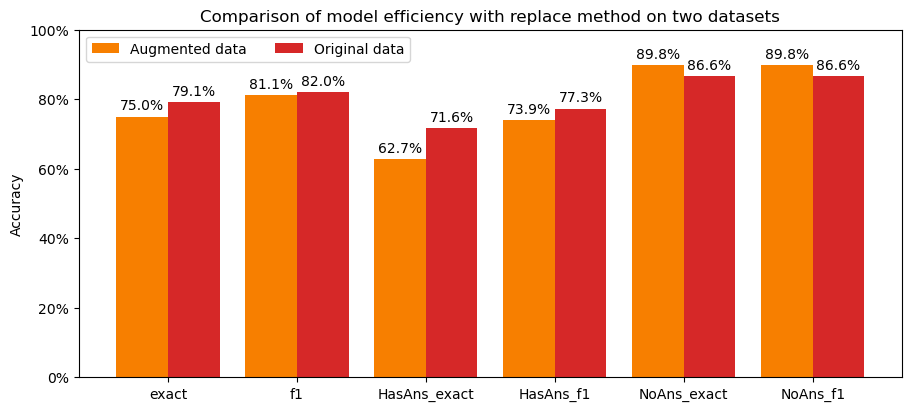

In [10]:
plot_compare(
    models=['replace_train_55', 'replace_eval_55'],
    inds=['epoch-2', 'epoch-2'],
    compare_values=['Augmented data', 'Original data'],
    title="Comparison of model efficiency with replace method on two datasets",
    colors=['#f77f00', '#d62828'],
    width_offset=0.5
)

For model replace_train_55
Total samples: 31808
Negative samples: 0.45211896378269617
For model replace_train_73
Total samples: 31808
Negative samples: 0.45211896378269617
For model replace_train_82
Total samples: 31808
Negative samples: 0.45211896378269617


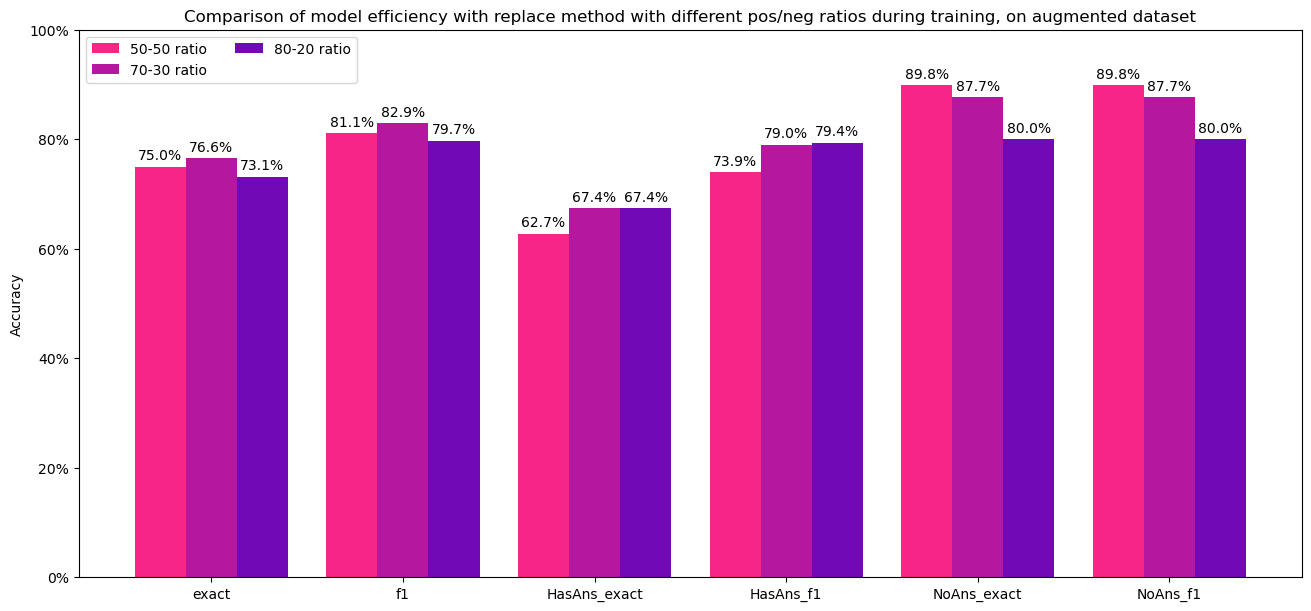

In [135]:
plot_compare(
    models=['replace_train_55', 'replace_train_73', 'replace_train_82'],
    inds=['epoch-2', 'epoch-1', 'epoch-2'],
    compare_values=['50-50 ratio', '70-30 ratio', '80-20 ratio'],
    title="Comparison of model efficiency with replace method with different pos/neg ratios during training, on augmented dataset",
    colors=['#f72585', '#b5179e', '#7209b7', '#560bad'],
    width_offset=1
)

For model replace_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081
For model replace_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081
For model replace_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081


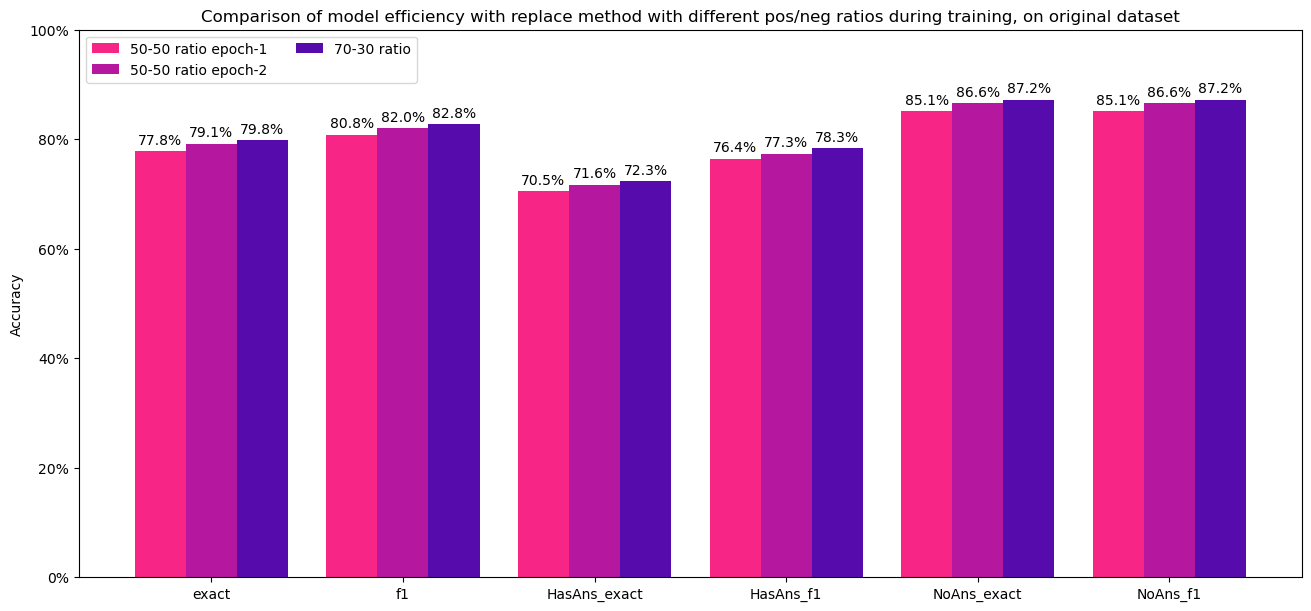

In [112]:
plot_compare(
    models=['replace_eval_55', 'replace_eval_55', 'replace_eval_73'],
    inds=['epoch-1', 'epoch-2', 'epoch-1'],
    compare_values=['50-50 ratio epoch-1', '50-50 ratio epoch-2', '70-30 ratio'],
    title="Comparison of model efficiency with replace method with different pos/neg ratios during training, on original dataset",
    colors=['#f72585', '#b5179e', '#560bad'],
    width_offset=1
)

For model swap_train_55
Total samples: 38036
Negative samples: 0.5435639920075718
For model swap_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081


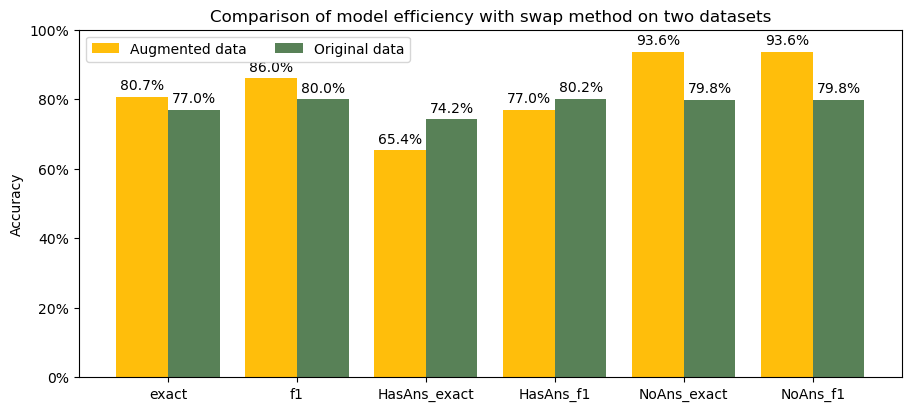

In [103]:
plot_compare(
    models=['swap_train_55', 'swap_eval_55'],
    inds=['epoch-2', 'epoch-2'],
    compare_values=['Augmented data', 'Original data'],
    title="Comparison of model efficiency with swap method on two datasets",
    colors=['#ffbe0b', '#588157'],
    width_offset=0.5
)

For model swap_train_55
Total samples: 38036
Negative samples: 0.5435639920075718
For model swap_train_55
Total samples: 38036
Negative samples: 0.5435639920075718
For model swap_train_73
Total samples: 38036
Negative samples: 0.5435639920075718


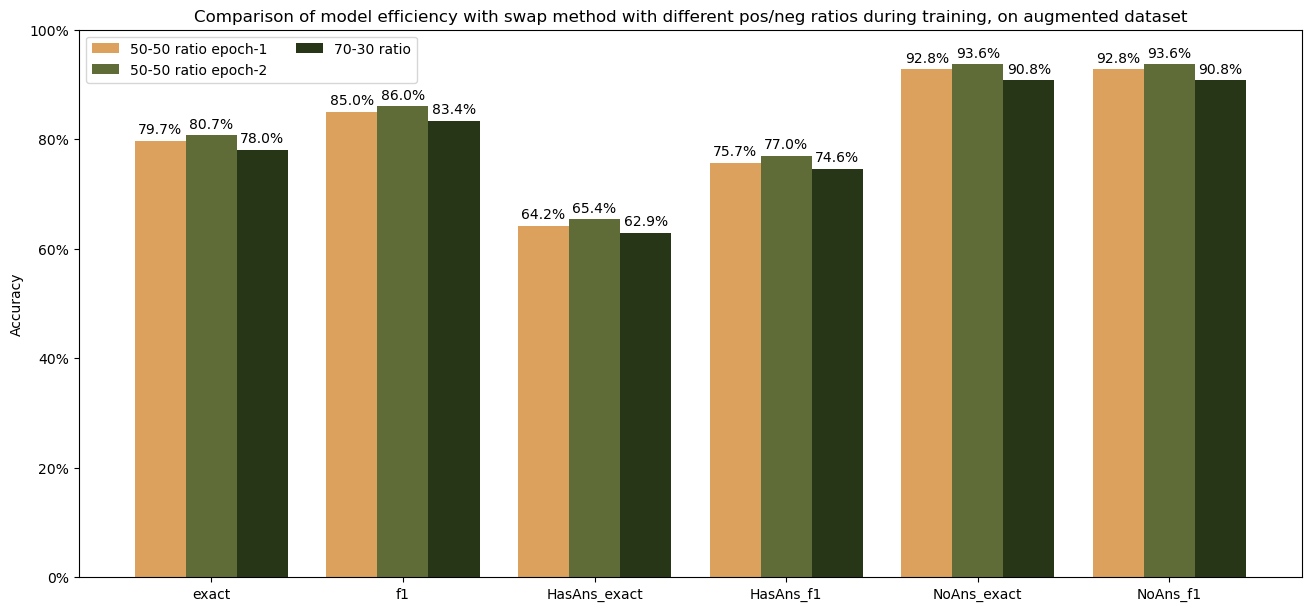

In [110]:
plot_compare(
    models=['swap_train_55', 'swap_train_55', 'swap_train_73'],
    inds=['epoch-1', 'epoch-2', 'epoch-0'],
    compare_values=['50-50 ratio epoch-1', '50-50 ratio epoch-2', '70-30 ratio'],
    title="Comparison of model efficiency with swap method with different pos/neg ratios during training, on augmented dataset",
    colors=['#dda15e', '#606c38', '#283618'],
    width_offset=1
)

For model swap_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081
For model swap_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081
For model swap_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081


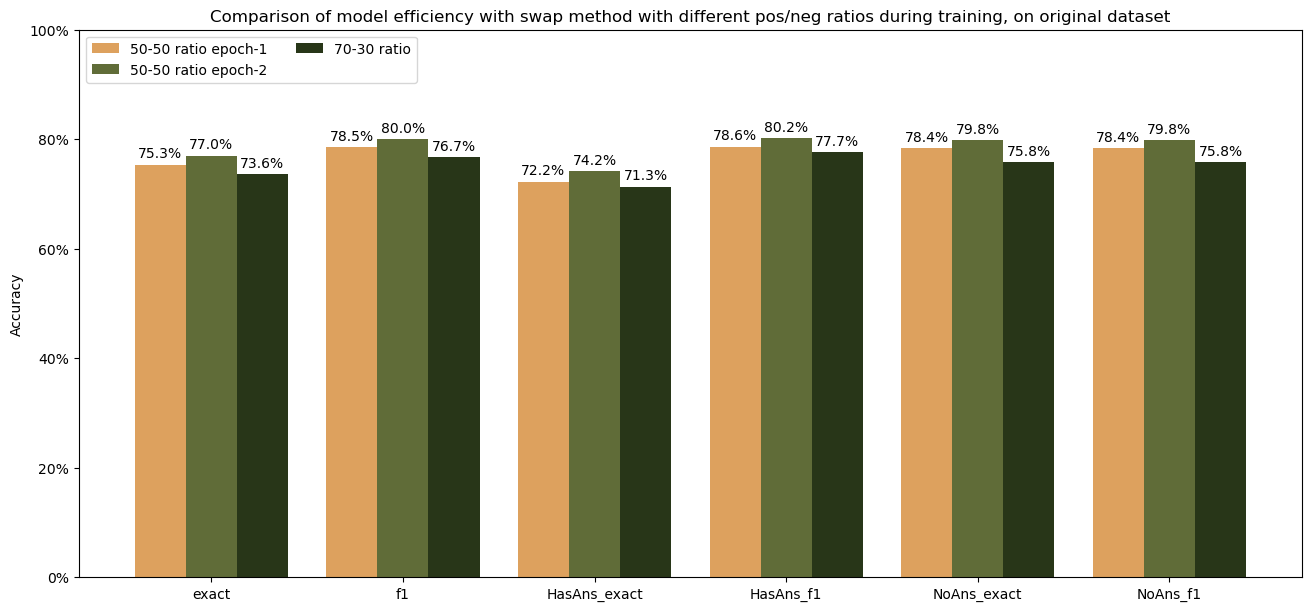

In [109]:
plot_compare(
    models=['swap_eval_55', 'swap_eval_55', 'swap_eval_73'],
    inds=['epoch-1', 'epoch-2', 'epoch-0'],
    compare_values=['50-50 ratio epoch-1', '50-50 ratio epoch-2', '70-30 ratio'],
    title="Comparison of model efficiency with swap method with different pos/neg ratios during training, on original dataset",
    colors=['#dda15e', '#606c38', '#283618'],
    width_offset=1
)

For model replace_train_73
Total samples: 31808
Negative samples: 0.45211896378269617
For model swap_train_55
Total samples: 38036
Negative samples: 0.5435639920075718


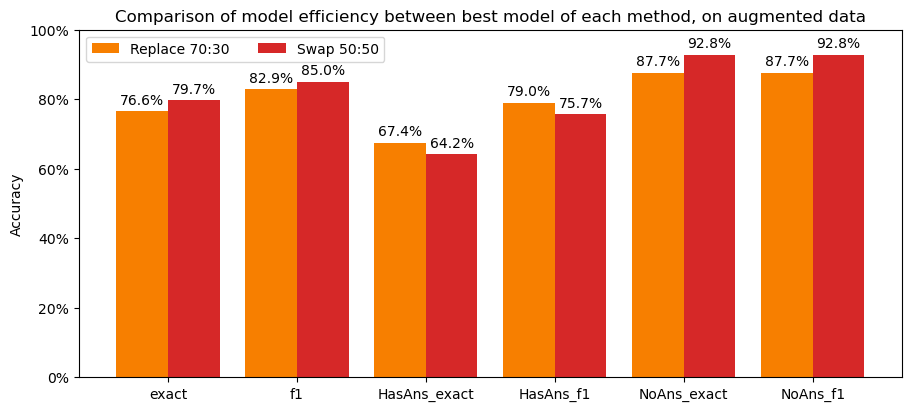

In [116]:
plot_compare(
    models=['replace_train_73', 'swap_train_55'],
    inds=['epoch-1', 'epoch-1'],
    compare_values=['Replace 70:30', 'Swap 50:50'],
    title="Comparison of model efficiency between best model of each method, on augmented data",
    colors=['#f77f00', '#d62828'],
    width_offset=0.5
)

For model replace_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081
For model swap_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081


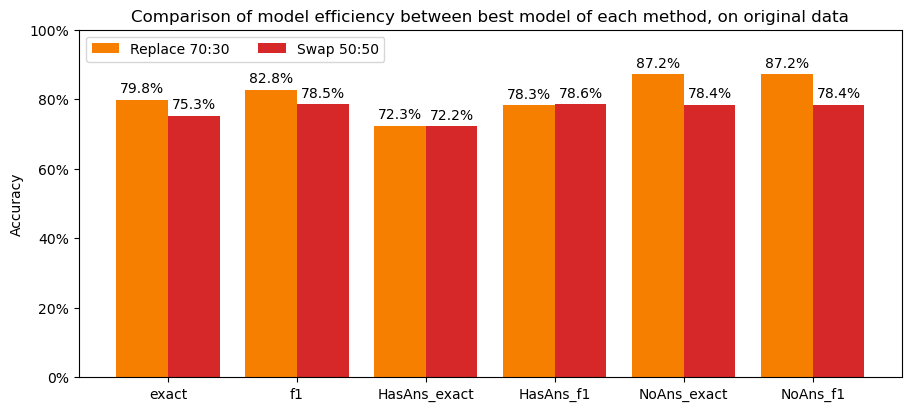

In [118]:
plot_compare(
    models=['replace_eval_73', 'swap_eval_55'],
    inds=['epoch-1', 'epoch-1'],
    compare_values=['Replace 70:30', 'Swap 50:50'],
    title="Comparison of model efficiency between best model of each method, on original data",
    colors=['#f77f00', '#d62828'],
    width_offset=0.5
)

For model original_eval_full
Total samples: 11873
Negative samples: 0.5007159100480081
For model original_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081


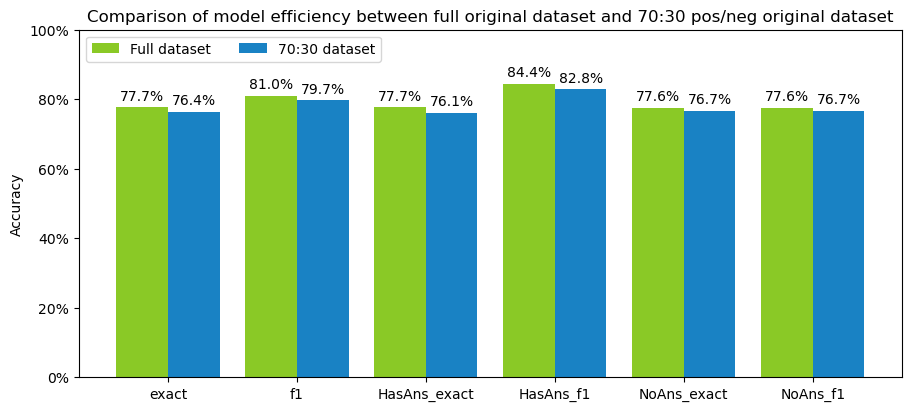

In [26]:
plot_compare(
    models=['original_eval_full', 'original_eval_73'],
    inds=['model', 'epoch-2'],
    compare_values=['Full dataset', '70:30 dataset'],
    title="Comparison of model efficiency between full original dataset and 70:30 pos/neg original dataset",
    colors=['#8ac926', '#1982c4'],
    width_offset=0.5
)

For model all_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081
For model all_eval_64
Total samples: 11873
Negative samples: 0.5007159100480081


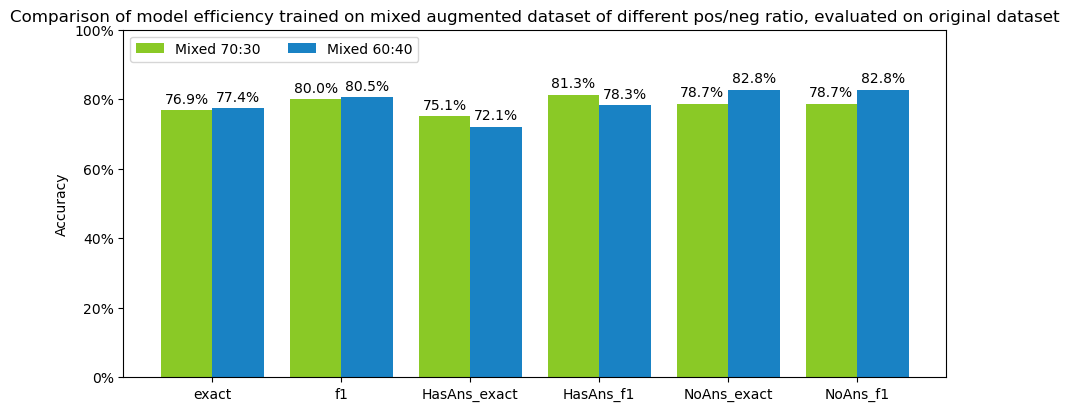

In [10]:
plot_compare(
    models=['all_eval_73', 'all_eval_64'],
    inds=['epoch-2', 'epoch-2'],
    compare_values=['Mixed 70:30', 'Mixed 60:40'],
    title="Comparison of model efficiency trained on mixed augmented dataset of different pos/neg ratio, evaluated on original dataset",
    colors=['#8ac926', '#1982c4'],
    width_offset=0.5
)

For model replace_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081
For model swap_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081
For model original_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081
For model original_eval_full
Total samples: 11873
Negative samples: 0.5007159100480081


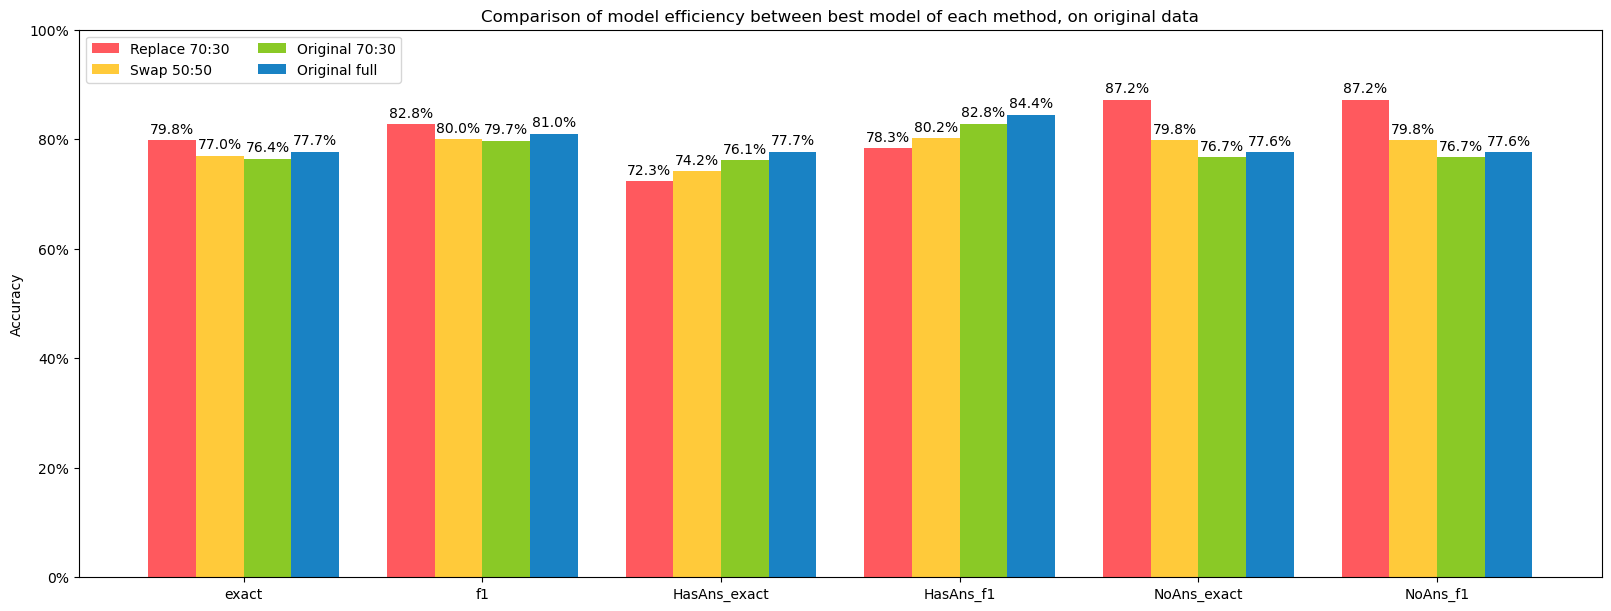

In [41]:
plot_compare(
    models=['replace_eval_73', 'swap_eval_55', 'original_eval_73', 'original_eval_full'],
    inds=['epoch-1', 'epoch-2', 'epoch-2', 'model'],
    compare_values=['Replace 70:30', 'Swap 50:50', 'Original 70:30', 'Original full'],
    title="Comparison of model efficiency between best model of each method, on original data",
    colors=["#ff595e","#ffca3a","#8ac926","#1982c4"],
    width_offset=1.5,
    figsize="16;6"
)

For model replace_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081
For model swap_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081
For model original_eval_full
Total samples: 11873
Negative samples: 0.5007159100480081
For model all_eval_64
Total samples: 11873
Negative samples: 0.5007159100480081


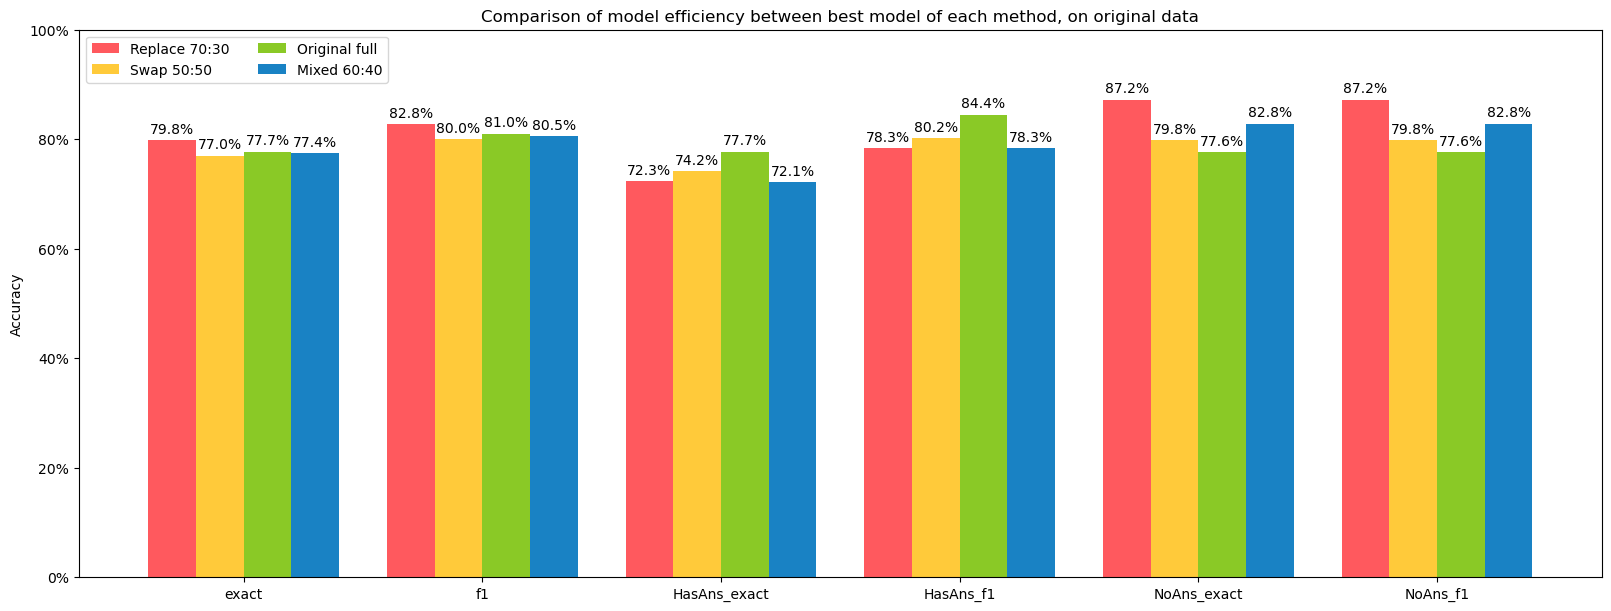

In [11]:
plot_compare(
    models=['replace_eval_73', 'swap_eval_55', 'original_eval_full', 'all_eval_64'],
    inds=['epoch-1', 'epoch-2', 'model', 'epoch-2'],
    compare_values=['Replace 70:30', 'Swap 50:50', 'Original full', 'Mixed 60:40'],
    title="Comparison of model efficiency between best model of each method, on original data",
    colors=["#ff595e","#ffca3a","#8ac926","#1982c4"],
    width_offset=1.5,
    figsize="16;6"
)

For model replace_train_73
Total samples: 31808
Negative samples: 0.45211896378269617
For model swap_train_55
Total samples: 38036
Negative samples: 0.5435639920075718
For model all_train_73
Total samples: 42310
Negative samples: 0.586197116520917


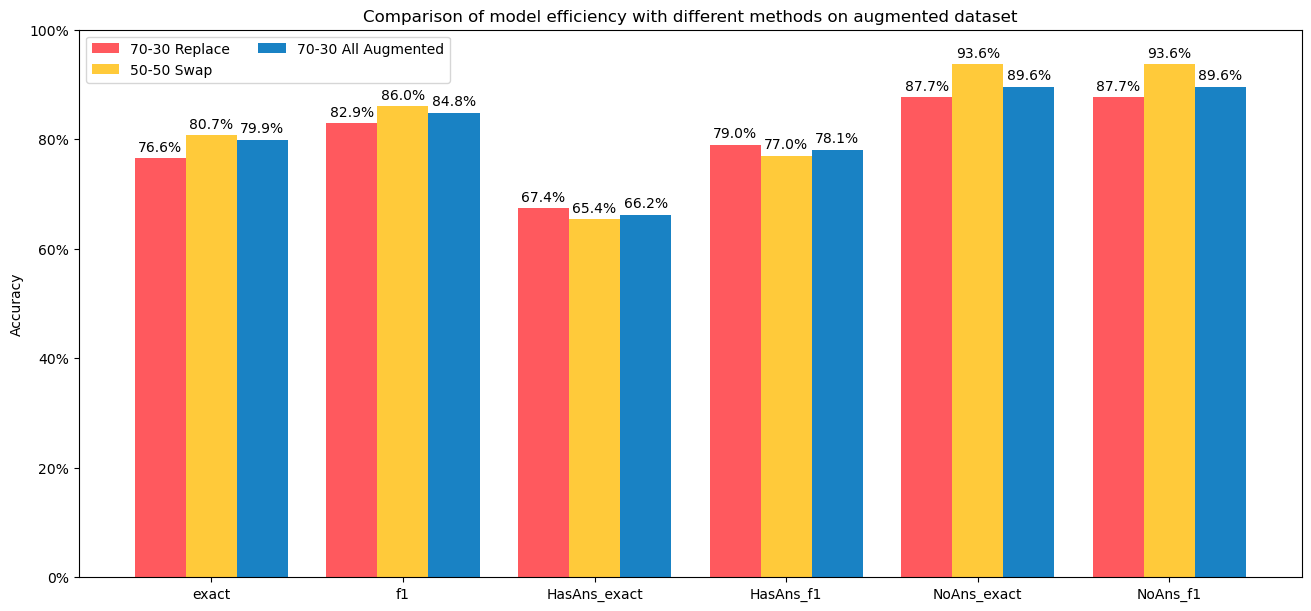

In [63]:
plot_compare(
    models=['replace_train_73', 'swap_train_55', 'all_train_73'],
    inds=['epoch-1', 'epoch-2', 'epoch-2'],
    compare_values=['70-30 Replace', '50-50 Swap', '70-30 All Augmented'],
    title="Comparison of model efficiency with different methods on augmented dataset",
    colors=["#ff595e","#ffca3a","#1982c4"],
    width_offset=1
)

For model replace_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081
For model swap_eval_55
Total samples: 11873
Negative samples: 0.5007159100480081
For model all_eval_73
Total samples: 11873
Negative samples: 0.5007159100480081


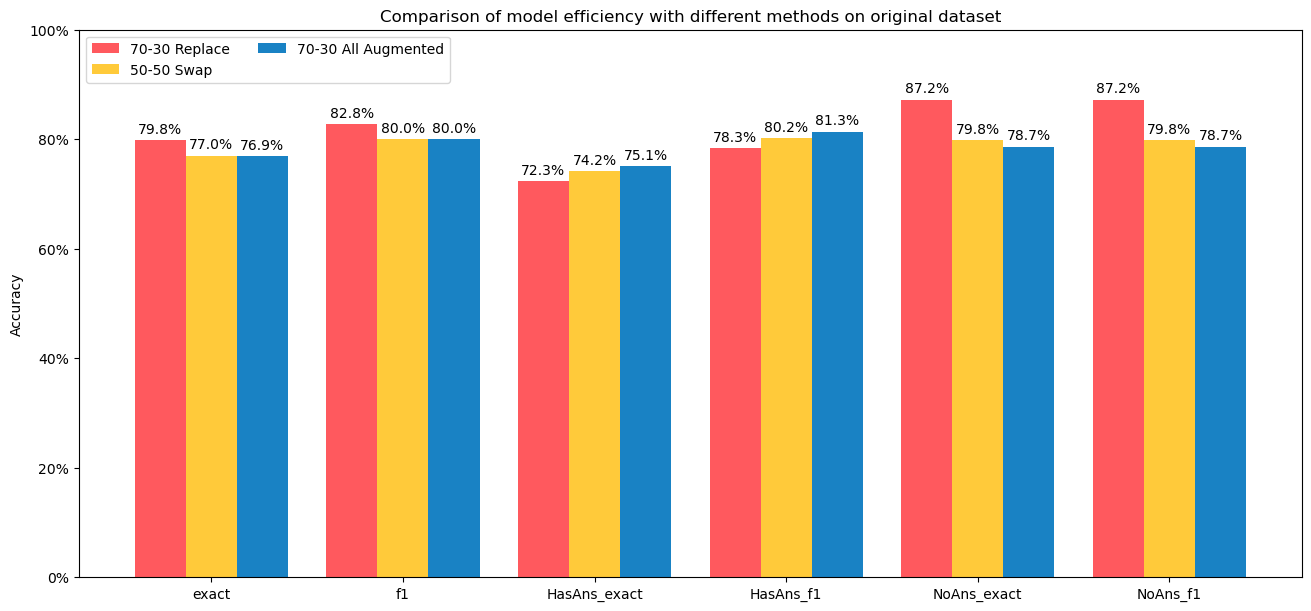

In [64]:
plot_compare(
    models=['replace_eval_73', 'swap_eval_55', 'all_eval_73'],
    inds=['epoch-1', 'epoch-2', 'epoch-2'],
    compare_values=['70-30 Replace', '50-50 Swap', '70-30 All Augmented'],
    title="Comparison of model efficiency with different methods on original dataset",
    colors=["#ff595e","#ffca3a","#1982c4"],
    width_offset=1
)

I want to create line plots

In [43]:
def plot_compare_line(models, inds, compare_values, title, colors, width_offset, figsize=None):
    # print out information 
    # for model, ind in zip(models, inds):
    #    print("For model", model)
    #    print("Total samples:", df.loc[model].loc[ind]['total'])
    #    print("Negative samples:", df.loc[model].loc[ind]['NoAns_total']/df.loc[model].loc[ind]['total'])

    # get df to plot 
    cols = ['exact', 'f1', 'HasAns_exact', 'HasAns_f1', 'NoAns_exact', 'NoAns_f1']
    df_list = [df.loc[model].loc[ind][cols] for model, ind in zip(models, inds)]
    df_compare = pd.concat(df_list, axis=1)
    df_compare.columns = models
    df_compare.columns = compare_values
    meas = df_compare.index.to_list()
    print(df_compare)

plot_compare_line(
    models=['replace_eval_73', 'swap_eval_55', 'original_eval_73', 'original_eval_full'],
    inds=['epoch-1', 'epoch-2', 'epoch-2', 'model'],
    compare_values=['Replace 70:30', 'Swap 50:50', 'Original 70:30', 'Original full'],
    title="Comparison of model efficiency between best model of each method, on original data",
    colors=["#ff595e","#ffca3a","#8ac926","#1982c4"],
    width_offset=1.5,
    figsize="16;6"
)

             Replace 70:30 Swap 50:50 Original 70:30 Original full
exact            79.769224  76.964541      76.400236     77.655184
f1               82.761999  79.960297      79.738531     81.005043
HasAns_exact     72.300945  74.156545      76.130229     77.715924
HasAns_f1        78.295076  80.156647      82.816393     84.425248
NoAns_exact      87.216148  79.764508       76.66947     77.594617
NoAns_f1         87.216148  79.764508       76.66947     77.594617


In [54]:
cols = ['exact', 'f1', 'HasAns_exact', 'HasAns_f1', 'NoAns_exact', 'NoAns_f1']
models = ['replace_train_55', 'replace_train_73', 'replace_train_82']
inds = ['epoch-1', 'epoch-1', 'epoch-1']
df_list = [df.loc[model].loc[ind][cols] for model, ind in zip(models, inds)]
df_compare = pd.concat(df_list, axis=1)
df_compare.columns = models
df_compare
    

,replace_train_55,replace_train_73,replace_train_82
exact,73.663858,76.556212,70.343939
f1,79.736418,82.919415,77.157804
HasAns_exact,61.163711,67.389683,66.465829
HasAns_f1,72.247431,79.003889,78.90259
NoAns_exact,88.811626,87.664279,75.04346
NoAns_f1,88.811626,87.664279,75.04346


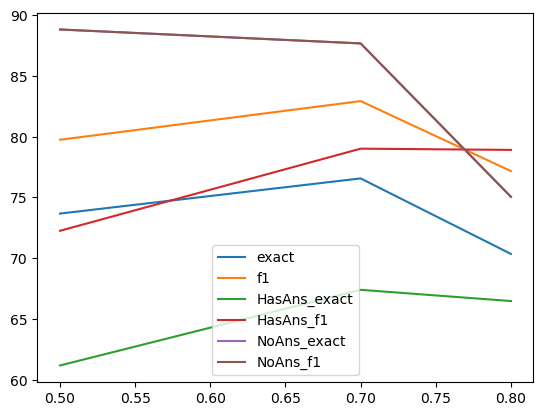

In [55]:
x = [0.5, 0.7, 0.8]
for ind in df_compare.index.to_list():
    # plot lines
    plt.plot(x, df_compare.loc[ind], label = ind)

plt.legend()
plt.show()